Dataset saved to regression_data.csv
   Temperature   Humidity  HoursOfDaylight  EnergyConsumption
0    14.981605  65.852937         9.481063          23.338776
1    38.028572  52.887709        12.335208         134.736930
2    29.279758  34.762209        14.983567         129.454714
3    23.946339  75.103602        13.857799          60.803528
4     6.240746  64.778494        14.452489          45.242970
Report:
Mean Squared Error (MSE): 28.45
R-squared (R²): 0.98


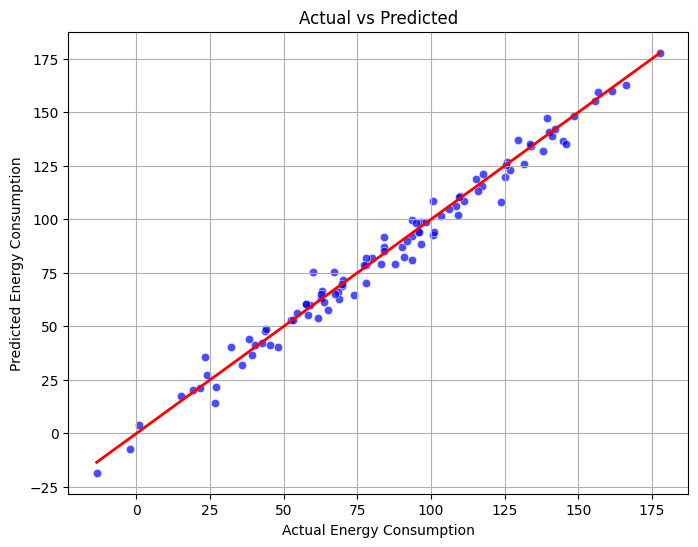

Feature Importance (Coefficients):
           Feature  Coefficient
0      Temperature     2.531143
1         Humidity    -1.188363
2  HoursOfDaylight     5.100948


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
num_samples = 500

# Generate synthetic features
temperature = np.random.uniform(0, 40, num_samples)  # Temperature in °C
humidity = np.random.uniform(10, 90, num_samples)    # Humidity in percentage
hours_of_daylight = np.random.uniform(8, 16, num_samples)  # Hours of daylight

# Continuous target: Energy consumption (in kWh)
# A simple formula: More temperature and daylight increases energy use
energy_consumption = (
    30 + 2.5 * temperature - 1.2 * humidity + 5 * hours_of_daylight +
    np.random.normal(0, 5, num_samples)  # Add some noise
)

# Create DataFrame
data = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'HoursOfDaylight': hours_of_daylight,
    'EnergyConsumption': energy_consumption
})

# Save as CSV
file_path = "regression_data.csv"
data.to_csv(file_path, index=False)
print(f"Dataset saved to {file_path}")

# Display sample data
print(data.head())

# Load dataset
data = pd.read_csv("regression_data.csv")

# Features and target
X = data[['Temperature', 'Humidity', 'HoursOfDaylight']]
y = data['EnergyConsumption']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Regression model
model = LinearRegression()
# model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Report:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted")
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.grid()
plt.show()

# Residuals calculation and visualization
# residuals = y_test - y_pred
# plt.figure(figsize=(8, 6))
# sns.histplot(residuals, kde=True, color='green', alpha=0.7)
# plt.title("Residuals Distribution")
# plt.xlabel("Residuals")
# plt.ylabel("Frequency")
# plt.grid()
# plt.show()

# Coefficients of the linear regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print("Feature Importance (Coefficients):")
print(coefficients)